In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import os
from math import * 
os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print("Moving up to the parent directory")
print(os.getcwd())

The current directory is: 
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project\notebooks
Moving up to the parent directory
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project


In [2]:
from stage0_configs import *
from modules.SOO_SIM import *
from modules.helper import *
from modules.hardeningLaws import *
info = main_config()


Welcome to the Abaqus parameter calibration project


The configurations you have chosen: 

+------------------------+-------------+
|     Global Configs     | User choice |
+------------------------+-------------+
| Number of initial sims |     100     |
|  Initial sims spacing  |    10000    |
|   Optimize strategy    |     SOO     |
|        Material        | DP1000_room |
|     Hardening law      |  SwiftVoce  |
|        Geometry        |    NDBR50   |
|      Curve index       |      2      |
|     Optimizer name     |      BO     |
|   Deviation percent    |      5      |
+------------------------+-------------+

Generating necessary directories

The path to your main project folder is

c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project



[{'c1': 0.9636963696369637, 'c2': 1161.8261826182618, 'c3': 0.055495549554955496, 'c4': 0.39153915391539157, 'c5': 569.91699169917, 'c6': 765.7065706570658, 'c7': 441.8028802880288}, {'c1': 0.5423542354235423, 'c2': 152.25522552255225, 'c3': 0.08969896989698971, 'c4': 0.678967896789679, 'c5': 1954.2054205420543, 'c6': 950.8550855085508, 'c7': 181.73717371737172}, {'c1': 0.33993399339933994, 'c2': 370.01700170017006, 'c3': 0.0018001800180018003, 'c4': 0.9534953495349535, 'c5': 328.97289728972896, 'c6': 870.2970297029702, 'c7': 388.35103510351036}, {'c1': 0.3933393339333934, 'c2': 174.29742974297432, 'c3': 0.07434743474347436, 'c4': 0.43784378437843785, 'c5': 891.8091809180919, 'c6': 405.6705670567057, 'c7': 472.97479747974796}, {'c1': 0.8448844884488449, 'c2': 164.03640364036403, 'c3': 0.053325332533253327, 'c4': 0.23442344234423443, 'c5': 938.3638363836384, 'c6': 813.6813681368137, 'c7': 603.057605760576}, {'c1': 0.6146614661466147, 'c2': 1230.4230423042304, 'c3': 0.04652465246524653, 

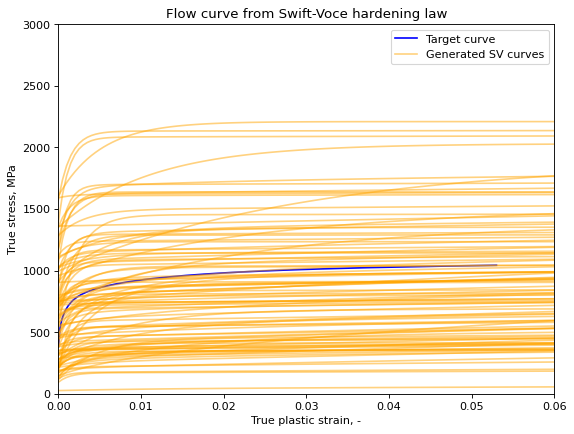

In [19]:
sim = SOO_SIM(info)
targetCurve = pd.read_csv(f"SOO_targets/DP1000_flowCurve/flowCurve.csv")
targetStrain = targetCurve["strain/-"]
targetStress = targetCurve["stress/MPa"]
paramsDict = sim.latin_hypercube_sampling()
print(paramsDict)
truePlasticStrain = info['truePlasticStrain']
# Plot the flow curve
figure(figsize=(8, 6), dpi=80)
plt.title("Flow curve from Swift-Voce hardening law")
plt.xlabel("True plastic strain, -")
plt.ylabel("True stress, MPa")
plt.plot(targetStrain, targetStress, color="blue", label="Target curve")
plt.xlim(0, 0.06)
plt.ylim([0,3000])
for param in paramsDict:
    trueStress = SwiftVoce(param["c1"], param["c2"], param["c3"], param["c4"], param["c5"], param["c6"], param["c7"], truePlasticStrain)
    plt.plot(truePlasticStrain, trueStress, color="orange", alpha=0.5)
plt.plot([], [], color="orange", alpha=0.5, label="Generated SV curves")
plt.legend()
np.save("parameters.npy", paramsDict)